In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import time
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [3]:
df = pd.read_pickle('mywafer.pkl')

In [4]:
df.head()

,index,diesize,lotname,waferindex,waferdims,train_test_label,failure_type,check_tuple,wafermap_reshape
0,0,1683.0,lot1,1.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,1,1683.0,lot1,2.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
2,2,1683.0,lot1,3.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,3,1683.0,lot1,4.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,4,1683.0,lot1,5.0,"(45, 48)",Training,none,True,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745630 entries, 0 to 745629
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             745630 non-null  int64  
 1   diesize           745630 non-null  float64
 2   lotname           745630 non-null  object 
 3   waferindex        745630 non-null  float64
 4   waferdims         745630 non-null  object 
 5   train_test_label  171350 non-null  object 
 6   failure_type      171350 non-null  object 
 7   check_tuple       745630 non-null  bool   
 8   wafermap_reshape  745630 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(5)
memory usage: 46.2+ MB


In [6]:
df_train = df[df['train_test_label']=='Training']
df_test = df[df['train_test_label']=='Test']
df_real = df[df['train_test_label'].isna()]

In [7]:
df_train.reset_index(inplace = True)
df_test.reset_index(inplace = True)
df_real.reset_index(inplace = True)
print(df_train.head(), df_test.head(), df_real.head())

   level_0  index  diesize lotname  waferindex waferdims train_test_label  \
0        0      0   1683.0    lot1         1.0  (45, 48)         Training   
1        1      1   1683.0    lot1         2.0  (45, 48)         Training   
2        2      2   1683.0    lot1         3.0  (45, 48)         Training   
3        3      3   1683.0    lot1         4.0  (45, 48)         Training   
4        4      4   1683.0    lot1         5.0  (45, 48)         Training   

  failure_type  check_tuple                                   wafermap_reshape  
0         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
1         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
2         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
3         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
4         none         True  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...      level_0   index  diesize   lotname  waferindex w

In [8]:
df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
df_real.drop(['level_0', 'index'], axis = 1, inplace = True)

/tmp/ipykernel_3388/2479246445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['level_0', 'index'], axis = 1, inplace = True)
/tmp/ipykernel_3388/2479246445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['level_0', 'index'], axis = 1, inplace = True)
/tmp/ipykernel_3388/2479246445.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real.drop(['level_0', 'index'], axis = 1, inplace = True)


In [9]:
np.unique(df_train['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([ 3415,   408,  2355,  7856,  1487,    54,   595,   394, 36341]))

In [10]:
np.unique(df_test['failure_type'], return_counts = True)

(array(['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full',
        'Random', 'Scratch', 'none'], dtype=object),
 array([   832,    146,   2772,   1126,   1971,     95,    257,    686,
        110560]))

In [11]:
np.unique(df_real['failure_type'], return_counts = True)

(array([nan, nan, nan, ..., nan, nan, nan], dtype=object),
 array([1, 1, 1, ..., 1, 1, 1]))

## 1. 결측 패턴 확인

In [12]:
img, count = np.unique(df_train['failure_type'], return_counts = True)

def check_failure(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[12]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'gray')
        title_font = {'fontsize': 16, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0
            
def check_failuretype(df, img_list):
    ct, e = 0, 0
    fig, axes = plt.subplots(3,3, figsize = (15,15))
    for i in range(len(img_list)):
        filter1 = img_list[i]
        data = df[df['failure_type'] == filter1]
        index = data.index[0]
        axes[e][ct].imshow(data['wafermap_reshape'][index], cmap = 'RdPu')
        title_font = {'fontsize': 20, 'fontweight': 'bold'}
        axes[e][ct].set_title(img_list[i], fontdict = title_font)
        ct += 1
        if (i == 2) | (i == 5):
            e += 1
            ct = 0

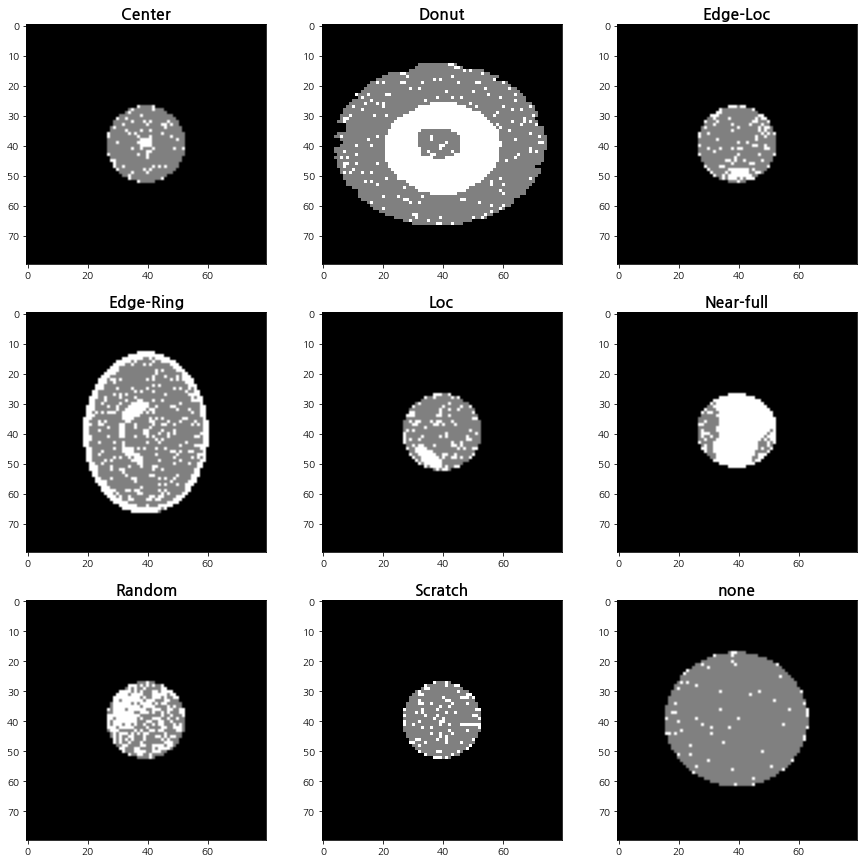

In [13]:
check_failure(df_train, img) # Donut, Edge-Ring 

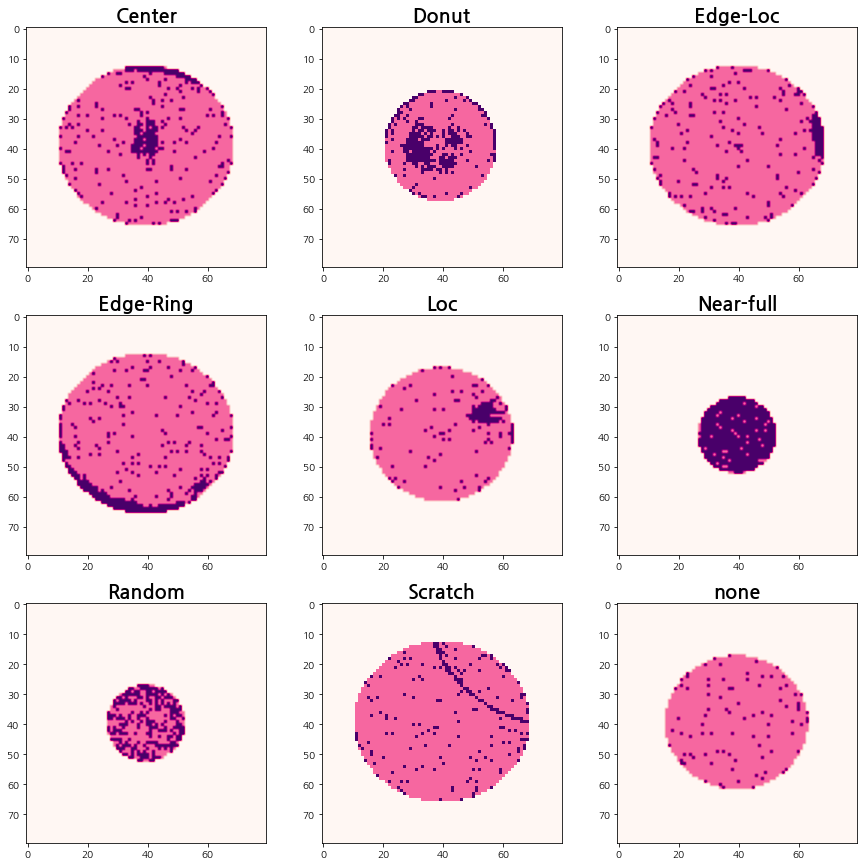

In [14]:
check_failuretype(df_train, img) # Center, Edge-Loc, Near-full

## 2. lot num별로 통계치 분석 

In [15]:
df11 = df[['lotname', 'diesize']]
df11.head()

,lotname,diesize
0,lot1,1683.0
1,lot1,1683.0
2,lot1,1683.0
3,lot1,1683.0
4,lot1,1683.0


In [16]:
g1 = df11.groupby('lotname').aggregate([min, max, np.mean, np.median])
g1

diesize                         
             min     max     mean  median
lotname                                  
lot1      1683.0  1683.0  1683.00  1683.0
lot10      533.0   533.0   533.00   533.0
lot100     533.0   533.0   533.00   533.0
lot10000   904.0   904.0   904.00   904.0
lot10001   904.0   904.0   904.00   904.0
...          ...     ...      ...     ...
lot9995   2005.0  2007.0  2006.88  2007.0
lot9996   2002.0  2007.0  2006.36  2007.0
lot9997    904.0   904.0   904.00   904.0
lot9998    904.0   904.0   904.00   904.0
lot9999    904.0   904.0   904.00   904.0

[42548 rows x 4 columns]

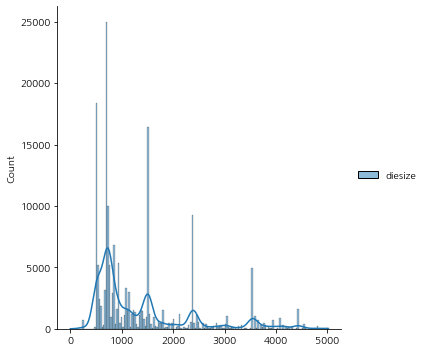

In [17]:
sns.displot(data = g1, kde = True)

## lot number 별 waferdims and waferdims별 failure_type 확인

In [20]:
ex_df = df[['lotname', 'diesize', 'waferdims', 'failure_type']]
ex_df.head()

,lotname,diesize,waferdims,failure_type
0,lot1,1683.0,"(45, 48)",none
1,lot1,1683.0,"(45, 48)",none
2,lot1,1683.0,"(45, 48)",none
3,lot1,1683.0,"(45, 48)",none
4,lot1,1683.0,"(45, 48)",none


In [27]:
ex_df['lotname_cat'] = ex_df['lotname'].astype('category').cat.codes

/tmp/ipykernel_3388/298861814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['lotname_cat'] = ex_df['lotname'].astype('category').cat.codes


In [28]:
ex_df['waferdims_cat'] = ex_df['waferdims'].astype('category').cat.codes

/tmp/ipykernel_3388/3917643646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ex_df['waferdims_cat'] = ex_df['waferdims'].astype('category').cat.codes


In [29]:
ex_df.head()

,lotname,diesize,waferdims,failure_type,lotname_cat,waferdims_cat
0,lot1,1683.0,"(45, 48)",none,0,227
1,lot1,1683.0,"(45, 48)",none,0,227
2,lot1,1683.0,"(45, 48)",none,0,227
3,lot1,1683.0,"(45, 48)",none,0,227
4,lot1,1683.0,"(45, 48)",none,0,227


In [ ]:
fig, axe = plt.subplots(figsize=(10,5))
axe = sns.countplot(data = ex_df, y = 'lotname', palette = 'hls', order = ex_df['lotname'].value_counts().index)
axe.set_xticklabels(axe.get_xticklabels(), rotation = 45)
axe.set_title('노트북 브랜드별 수')
#axe.bar_label(axe.containers[0])

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (20,10))
sns.histplot(data = ex_df, x = 'lotname', y = 'waferdims', ax = axes[0])